# Patient Satisfaction Analysis

The patient satisfaction data  is used in this notebook to identify factors infuencing the patient satisfaction level \
and the possible ways for amelioration (wait time, pain management, communication with medical staff, etc.)

In [1]:
import pandas as pd

In the dataframe, we have for each row:
patient_id              patient unique id
age                     patient age
sex                     patient sexe
service                 
communication_score	    1 → 10	1 = very bad communication, 10 = excellent communication 
pain_management_score	1 → 10	1 = pain very badly managed, 10 = pain managed with perfection
overall_satisfaction	1 → 10	1 = patient totally unsatisfied, 10 = patient very satisfied

In [2]:
df = pd.read_csv("../data/patient_satisfaction_dataset.csv")
df.head()

,patient_id,age,sex,service,wait_time_minutes,communication_score,pain_management_score,overall_satisfaction
0,1,69,Femme,Médecine interne,222,1,5,2.0
1,2,32,Femme,Cardiologie,173,3,5,3.0
2,3,89,Homme,Pédiatrie,7,10,2,6.0
3,4,78,Homme,Médecine interne,124,8,5,7.0
4,5,38,Homme,Médecine interne,10,4,4,6.0


In [3]:
df.describe()

,patient_id,age,wait_time_minutes,communication_score,pain_management_score,overall_satisfaction
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,52.930000,120.438000,5.426000,5.594000,5.436000
std,144.481833,21.009519,69.287601,2.827103,2.837122,1.818934
min,1.000000,18.000000,5.000000,1.000000,1.000000,1.000000
25%,125.750000,34.000000,60.000000,3.000000,3.000000,4.000000
50%,250.500000,52.000000,122.500000,5.000000,5.000000,6.000000
75%,375.250000,71.000000,181.000000,8.000000,8.000000,7.000000
max,500.000000,89.000000,239.000000,10.000000,10.000000,10.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             500 non-null    int64  
 1   age                    500 non-null    int64  
 2   sex                    500 non-null    object 
 3   service                500 non-null    object 
 4   wait_time_minutes      500 non-null    int64  
 5   communication_score    500 non-null    int64  
 6   pain_management_score  500 non-null    int64  
 7   overall_satisfaction   500 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 31.4+ KB


## Data Insights

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Overall satisfaction distribution')

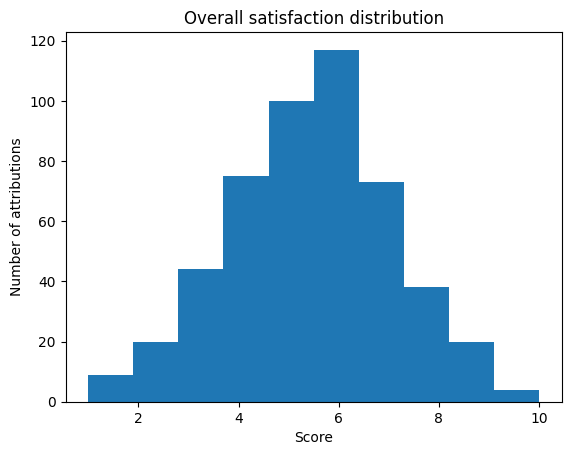

In [6]:
plt.figure()
plt.hist(df.overall_satisfaction)
plt.xlabel('Score')
plt.ylabel('Number of attributions')
plt.title('Overall satisfaction distribution')

Almost 118 patients gave an overall satisfaction score of 6, few patients (less than 10) gave very bad or very good scores. 

Text(0.5, 1.0, 'Waiting time in minutes distribution')

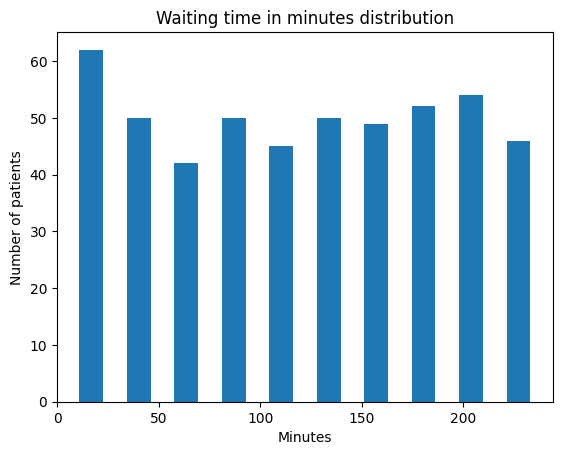

In [7]:
plt.figure()
plt.hist(df.wait_time_minutes, bins = 10, rwidth=0.5)
plt.xlabel('Minutes')
plt.ylabel('Number of patients')
plt.title('Waiting time in minutes distribution')

Most patients experienced short waiting times (around 10 minutes), but the distribution is highly skewed — some patients waited over 200 minutes, which could strongly affect satisfaction.

Text(0.5, 1.0, 'Pain management score distribution')

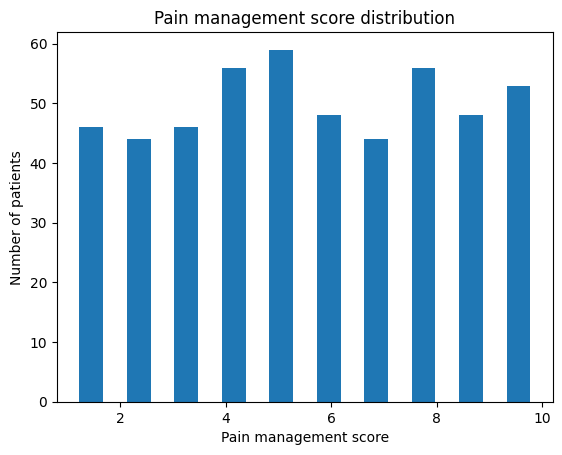

In [8]:
plt.figure()
plt.hist(df.pain_management_score, bins = 10, rwidth=0.5)
plt.xlabel('Pain management score')
plt.ylabel('Number of patients')
plt.title('Pain management score distribution')

The pain management distribution is scarce, patients gave scores from 1 to 10 mostly equally. 

## Satisfaction vs studied factors

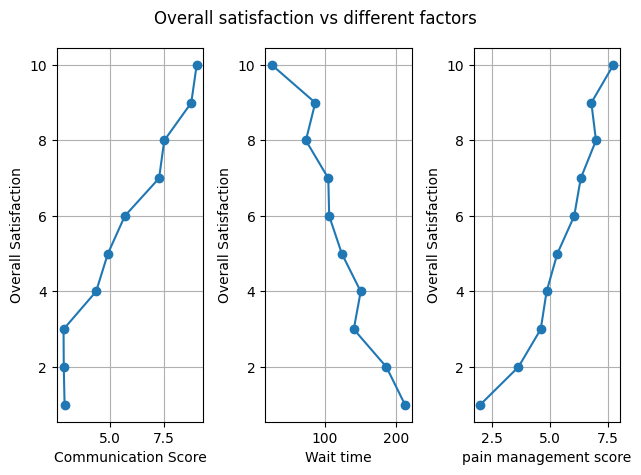

In [9]:
grouped_df = df.groupby("overall_satisfaction")[["communication_score", "wait_time_minutes", "pain_management_score"]].mean().reset_index()

plt.figure()
plt.subplot(1, 3, 1)
plt.plot(grouped_df["communication_score"], grouped_df["overall_satisfaction"], marker='o')
plt.xlabel("Communication Score")
plt.ylabel("Overall Satisfaction")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(grouped_df["wait_time_minutes"], grouped_df["overall_satisfaction"], marker='o')
plt.xlabel("Wait time")
plt.ylabel("Overall Satisfaction")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(grouped_df["pain_management_score"], grouped_df["overall_satisfaction"], marker='o')
plt.xlabel("pain management score")
plt.ylabel("Overall Satisfaction")
plt.suptitle("Overall satisfaction vs different factors")
plt.grid(True)

plt.tight_layout()
plt.show()




We can clearly see that the overall satisfaction increases with good communication and good pain management and decreases when the waiting time increases.

<AxesSubplot:xlabel='wait_time_minutes', ylabel='communication_score'>

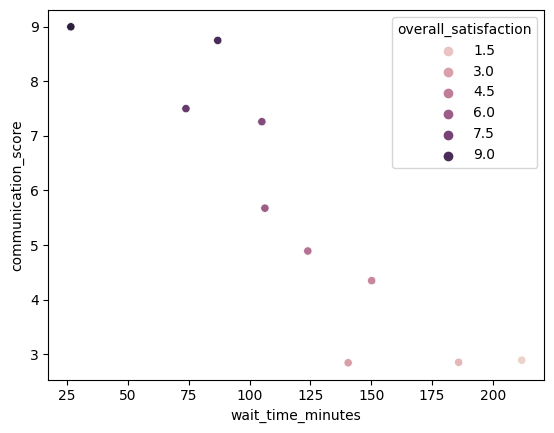

In [10]:
plt.figure()
sns.scatterplot(x = grouped_df.wait_time_minutes, y = grouped_df.communication_score, hue = grouped_df.overall_satisfaction)

This plot shows us that overall satisfaction increases with both good communication and fewer waited minutes. We can also see that when waiting time is important and communication with medical staff is bad, patients gave ver bad overall satifaction scores.

## Satisfaction per service

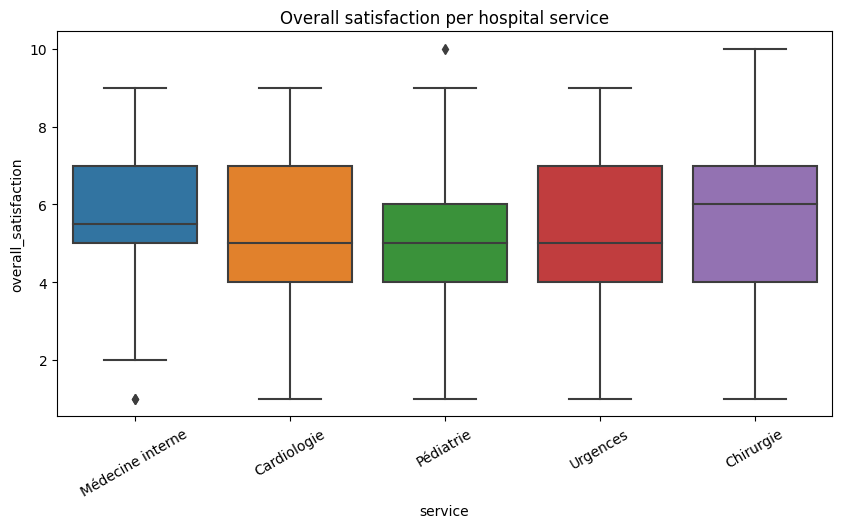

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x="service", y="overall_satisfaction", data=df)
plt.title("Overall satisfaction per hospital service")
plt.xticks(rotation=30)
plt.show()

The service that received the most positive feedback is Surgery — more than half of the patients who went there gave a score of 6.
The Pediatrics department shows the lowest variance in satisfaction scores, with 25% to 75% of patients giving ratings between 4 and 6.
Internal Medicine received overall ratings ranging mostly between 5 and 7.

## Correlation analysis

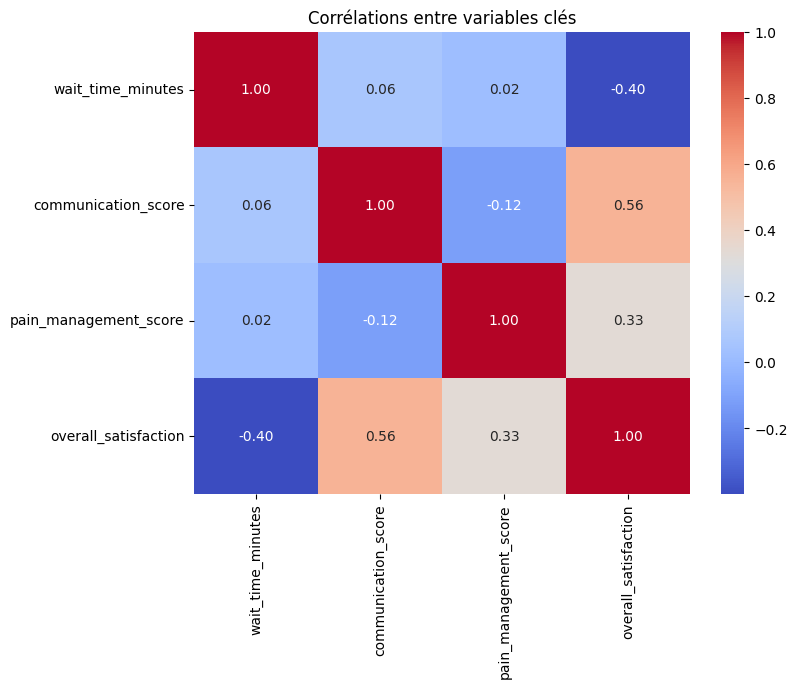

In [12]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[["wait_time_minutes", "communication_score", "pain_management_score", "overall_satisfaction"]].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélations entre variables clés")
plt.show()


Overall satisfaction has: 

Negative correlation with wait_time_minutes means long waits lower satisfaction.

Positive correlation with communication/pain management means those improve satisfaction.

## Insights Summary

Communication quality and pain management are the strongest drivers of satisfaction.

Long waiting times correlate negatively with satisfaction.

Pediatric services show the lowest variance — indicating consistent patient experiences.